<a href="https://colab.research.google.com/github/vishwanath103/MIT-DL-Course/blob/main/introtodeeplearning_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
#!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

In [7]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356, tf.float64)

print("'sport' is a {}-d tensor".format(tf.rank(sport).numpy()))
print("'number' is a {}-d tensor".format(tf.rank(number).numpy()))

'sport' is a 0-d tensor
'number' is a 0-d tensor


In [9]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.1415, 1.4142, 8.9], tf.float64)

print("'sports is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("'numbers is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

'sports is a 1-d Tensor with shape: [2]
'numbers is a 1-d Tensor with shape: [3]


In [10]:
matrix = tf.constant([[1,2,3],[5,6,7]], tf.float64)

assert isinstance(matrix, tf.Tensor)
assert tf.rank(matrix).numpy() == 2

In [11]:
images = tf.zeros([10,256,256,3], tf.int32)

assert isinstance(images, tf.Tensor)
assert tf.rank(images).numpy() == 4
assert tf.shape(images).numpy().tolist() == [10,256,256,3]

## Computations on Tensors

In [12]:
a = tf.constant(15)
b = tf.constant(64)

c1 = a+b
c2 = tf.add(a,b)
print(c1)
print(c2)

tf.Tensor(79, shape=(), dtype=int32)
tf.Tensor(79, shape=(), dtype=int32)


In [13]:
def func(a,b):
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

In [14]:
a,b = 1.5,2.5
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


## Neural networks in Tensorflow

In [20]:
class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    self.W = self.add_weight("weight",shape=[d, self.n_output_nodes])
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes])

  def call(self,x):
    z = tf.add(tf.matmul(x,self.W),self.b)
    y = tf.sigmoid(z)
    return y

tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.26978594 0.45750415 0.66536945]]
[PASS] test_custom_dense_layer_output


True

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3

model = Sequential()

dense_layer = Dense(n_output_nodes, activation='sigmoid')
model.add(dense_layer)

In [24]:
x_input = tf.constant([[1,2.]], shape=(1,2))

model_output = model(x_input).numpy()
print(model_output)

[[ 0.24415088  0.6485772  -1.9461871 ]]


In [25]:
# Defining a model using subclassing
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubClassModel(tf.keras.Model):
  def __init__(self, n_output_nodes):
    super(SubClassModel, self).__init__()
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid')

  def call(self, inputs):
    return self.dense_layer(inputs)

In [27]:
n_output_nodes = 3
model = SubClassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
print(model.call(x_input))

tf.Tensor([[0.6504886  0.4782816  0.83736604]], shape=(1, 3), dtype=float32)


In [28]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid')

  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity:
      return inputs
    return x

In [29]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)

print(f"Network output with activatio: {out_activate}; network identity output: {out_identity}")

Network output with activatio: [[0.29996255 0.62776643 0.48460072]]; network identity output: [[1. 2.]]


## Automatic differentiation in Tensorflow

In [33]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x * x

dy_dx = tape.gradient(y,x)

assert dy_dx.numpy() == 6.0

Initializing x=[[-1.1771783]]


Text(0, 0.5, 'x value')

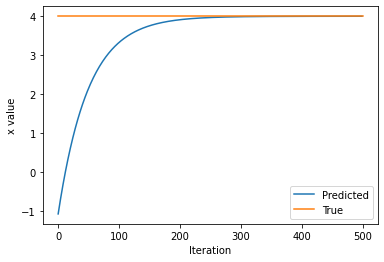

In [34]:
### Function minimization with automatic differentiation and SGD

x = tf.Variable([tf.random.normal([1])])
print(f"Initializing x={x.numpy()}")

learning_rate = 1e-2
history = []
x_f = 4

for i in range(500):
  with tf.GradientTape() as tape:
    loss = (x-x_f) ** 2

  grad = tape.gradient(loss, x)
  new_x = x - learning_rate*grad
  x.assign(new_x)
  history.append(x.numpy()[0])

plt.plot(history)
plt.plot([0,500],[x_f,x_f])
plt.legend(('Predicted','True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
